In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


df = pd.read_csv('/Users/sachinbhat/Desktop/Internship Projects/Vehicle Price Prediction/dataset.csv') 
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (1002, 17)


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [2]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

,count,mean,std,min,25%,50%,75%,max
year,1002.0,2023.916168,0.298109,2023.0,2024.0,2024.0,2024.0,2025.0
price,979.0,50202.985700,18700.392062,0.0,36600.0,47165.0,58919.5,195895.0
cylinders,897.0,4.975474,1.392526,0.0,4.0,4.0,6.0,8.0
mileage,968.0,69.033058,507.435745,0.0,4.0,8.0,13.0,9711.0
doors,995.0,3.943719,0.274409,2.0,4.0,4.0,4.0,5.0


In [3]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 description        56
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
dtype: int64


In [4]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 24


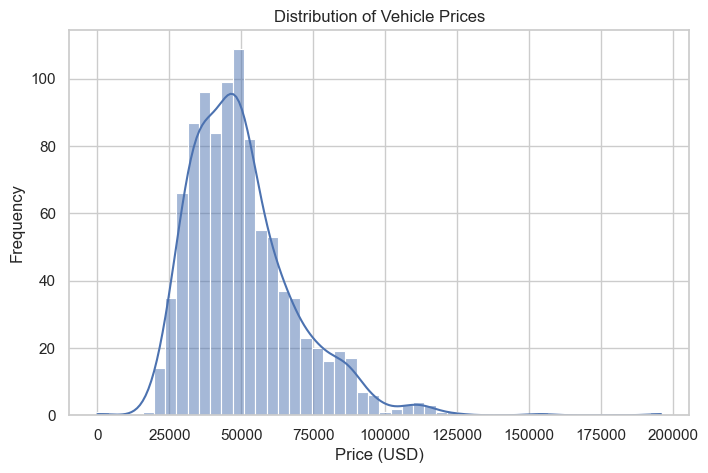

In [5]:
# Histogram of target variable: Price
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()



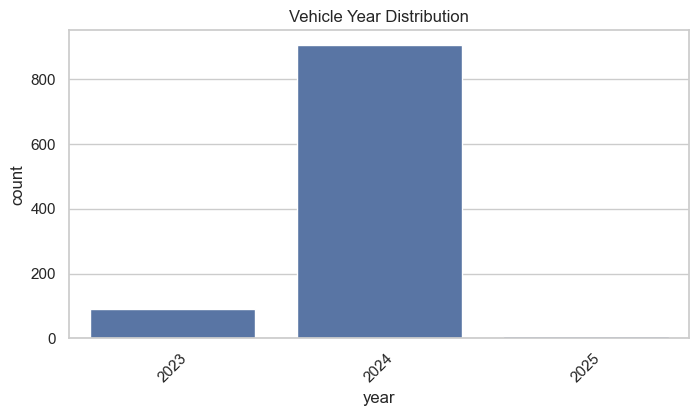

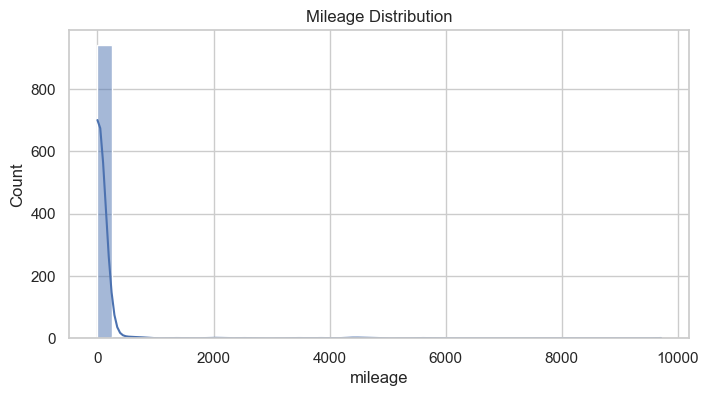

In [6]:
# Distribution of Year
plt.figure(figsize=(8, 4))
sns.countplot(x='year', data=df, order=sorted(df['year'].dropna().unique()))
plt.xticks(rotation=45)
plt.title('Vehicle Year Distribution')
plt.show()

# Mileage distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['mileage'], bins=40, kde=True)
plt.title('Mileage Distribution')
plt.show()

In [8]:
# Check unique values in key categorical columns
cat_cols = ['make', 'model', 'fuel', 'transmission', 'body', 'drivetrain']
for col in cat_cols:
    print(f"\n{col.upper()} - Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head(10))  # Top 10 most frequent


MAKE - Unique values: 28
make
Jeep          194
Hyundai       121
Dodge         117
Ford           88
RAM            79
Kia            52
Chevrolet      49
Nissan         40
Volkswagen     38
Mazda          38
Name: count, dtype: int64

MODEL - Unique values: 153
model
Hornet                65
3500                  52
Compass               47
Durango               41
CX-90 PHEV            34
Tucson Hybrid         33
Grand Cherokee        29
Grand Cherokee 4xe    28
Grand Cherokee L      28
Silverado 1500        27
Name: count, dtype: int64

FUEL - Unique values: 7
fuel
Gasoline                664
Hybrid                  137
Electric                 99
Diesel                   73
PHEV Hybrid Fuel         16
E85 Flex Fuel             5
Diesel (B20 capable)      1
Name: count, dtype: int64

TRANSMISSION - Unique values: 38
transmission
8-Speed Automatic                    325
Automatic                            236
6-Speed Automatic                     98
1-Speed Automatic              

In [7]:

df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.duplicated().sum())

After removing duplicates: 0


In [8]:
df = df.dropna(subset=['price'])  # Essential: can't train without target

In [9]:
df.drop(columns=['description'], inplace=True) #description is not a necessary feature to predict price

In [10]:
# Numerical columns: Fill with median to maintain model robustness (less skewed towards outlier than mean)
df['mileage'] = df['mileage'].fillna(df['mileage'].median())
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())
df['doors'] = df['doors'].fillna(df['doors'].median())

# Categorical columns: Fill with mode (always impute categorical columns with mode)
cat_fill_cols = ['engine', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color']
for col in cat_fill_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
from datetime import datetime
df['vehicle_age'] = datetime.now().year - df['year']
#creates a new feature called vehicle age, making the feature numerical rather than categorical with the year

In [12]:
df.drop(columns=['year'], inplace=True)


In [13]:
#one hot encoding for categorical columns to make them useable and readble by the model
cat_cols = ['make', 'model', 'fuel', 'transmission', 'body', 'trim', 
            'drivetrain', 'engine', 'exterior_color', 'interior_color']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [14]:
#sanity check
print("Final shape of cleaned dataset:", df.shape)
print("Any remaining null values?", df.isnull().sum().sum())

Final shape of cleaned dataset: (955, 881)
Any remaining null values? 0


In [15]:
df.drop(columns=['name'], inplace=True)

In [16]:
#sanity check
print("Final shape of cleaned dataset:", df.shape)
print("Any remaining null values?", df.isnull().sum().sum())

Final shape of cleaned dataset: (955, 880)
Any remaining null values? 0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['price'])
y = df['price']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)




In [20]:
print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}")

Train size: (667, 879), Validation size: (144, 879), Test size: (144, 879)


In [18]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)


LinearRegression()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_val_pred = baseline_model.predict(X_val)

# Evaluation metrics
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("Baseline Model Performance on Validation Set:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

Baseline Model Performance on Validation Set:
MAE: $98,851,327,653.92
RMSE: $240,802,708,915.32
R² Score: -160648836897139.4375


In [20]:
preds = baseline_model.predict(X_train.iloc[:5])
actuals = y_train.iloc[:5].values

for i in range(5):
    print(f"Sample {i+1}: Predicted = ${preds[i]:,.2f}, Actual = ${actuals[i]:,.2f}")

Sample 1: Predicted = $20,839.60, Actual = $20,842.00
Sample 2: Predicted = $49,901.96, Actual = $49,895.00
Sample 3: Predicted = $32,484.20, Actual = $32,485.00
Sample 4: Predicted = $47,289.72, Actual = $47,290.00
Sample 5: Predicted = $34,672.88, Actual = $35,835.00


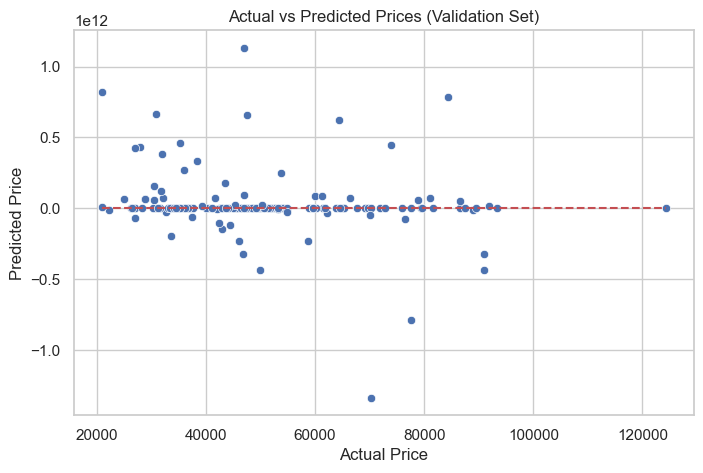

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.title('Actual vs Predicted Prices (Validation Set)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [22]:
print("y_val shape:", y_val.shape)
print("y_val_pred shape:", y_val_pred.shape)


y_val shape: (144,)
y_val_pred shape: (144,)


In [23]:
for i in range(5):
    print(f"Predicted: ${y_val_pred[i]:,.2f}, Actual: ${y_val.iloc[i]:,.2f}")


Predicted: $-148,206,436,462.38, Actual: $42,990.00
Predicted: $47,032.57, Actual: $49,836.00
Predicted: $-323,989,545,981.03, Actual: $46,905.00
Predicted: $47,839.81, Actual: $45,373.00
Predicted: $38,339.16, Actual: $36,882.00


In [24]:
X_val.describe().T.sort_values('max', ascending=False)


,count,mean,std,min,25%,50%,75%,max
mileage,144.0,49.472222,324.890319,0.0,5.0,8.5,14.25,3838.0
cylinders,144.0,4.888889,1.317505,3.0,4.0,4.0,6.00,8.0
doors,144.0,3.930556,0.327157,2.0,4.0,4.0,4.00,4.0
vehicle_age,144.0,1.055556,0.284268,0.0,1.0,1.0,1.00,2.0


In [25]:
# Cap mileage at the 99th percentile
q99 = df['mileage'].quantile(0.95)
df['mileage'] = np.where(df['mileage'] > q99, q99, df['mileage'])


In [26]:
X_val.describe().T.sort_values('max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
mileage,144.0,49.472222,324.890319,0.0,5.0,8.5,14.25,3838.0
cylinders,144.0,4.888889,1.317505,3.0,4.0,4.0,6.00,8.0
doors,144.0,3.930556,0.327157,2.0,4.0,4.0,4.00,4.0
vehicle_age,144.0,1.055556,0.284268,0.0,1.0,1.0,1.00,2.0


In [27]:
df['mileage'].quantile([0.90, 0.95, 0.98, 0.99, 0.995, 1.0])


0.900    26.00
0.950    58.09
0.980    58.30
0.990    58.30
0.995    58.30
1.000    58.30
Name: mileage, dtype: float64

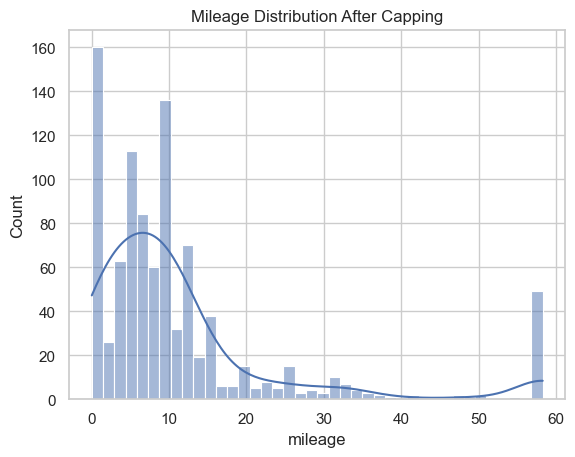

In [28]:
import matplotlib.pyplot as plt
sns.histplot(df['mileage'], bins=40, kde=True)
plt.title("Mileage Distribution After Capping")
plt.show()


In [29]:
# 1. Calculate the 95th percentile value
mileage_cap = df['mileage'].quantile(0.95)

# 2. Replace any values above that threshold with the cap
df['mileage'] = np.where(df['mileage'] > mileage_cap, mileage_cap, df['mileage'])

# 3. (Optional) Confirm it worked
print(df['mileage'].describe())


count    955.000000
mean      11.523895
std       13.539691
min        0.000000
25%        4.000000
50%        8.000000
75%       12.000000
max       58.090000
Name: mileage, dtype: float64


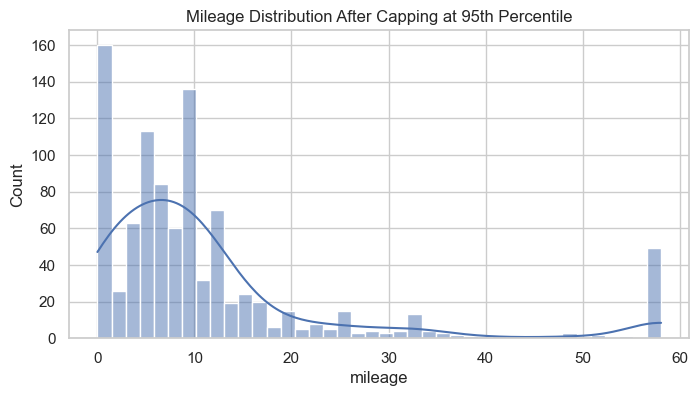

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df['mileage'], bins=40, kde=True)
plt.title("Mileage Distribution After Capping at 95th Percentile")
plt.show()


In [31]:
X = df.drop(columns=['price'])
y = df['price']


In [32]:
preds = baseline_model.predict(X_train.iloc[:5])
actuals = y_train.iloc[:5].values

for i in range(5):
    print(f"Sample {i+1}: Predicted = ${preds[i]:,.2f}, Actual = ${actuals[i]:,.2f}")

Sample 1: Predicted = $20,839.60, Actual = $20,842.00
Sample 2: Predicted = $49,901.96, Actual = $49,895.00
Sample 3: Predicted = $32,484.20, Actual = $32,485.00
Sample 4: Predicted = $47,289.72, Actual = $47,290.00
Sample 5: Predicted = $34,672.88, Actual = $35,835.00


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_val_pred = baseline_model.predict(X_val)

# Evaluation metrics
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("Baseline Model Performance on Validation Set:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

Baseline Model Performance on Validation Set:
MAE: $98,851,327,653.92
RMSE: $240,802,708,915.32
R² Score: -160648836897139.4375


In [34]:
# 1. Redefine feature set
X = df.drop(columns=['price'])
y = df['price']

# 2. Re-split into train/validation sets
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

# 3. Train model
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# 4. Predict on CURRENT validation set
y_val_pred = baseline_model.predict(X_val)

# 5. Now safely compute metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("Baseline Model Performance on Validation Set:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


Baseline Model Performance on Validation Set:
MAE: $1,772,823,719,949.62
RMSE: $4,344,518,924,987.42
R² Score: -52292359222831768.0000


In [38]:
print("First few predictions:")
for i in range(5):
    print(f"Predicted: ${y_val_pred[i]:,.2f}, Actual: ${y_val.iloc[i]:,.2f}")


First few predictions:
Predicted: $5,309,717,938,335.25, Actual: $42,990.00
Predicted: $47,530.97, Actual: $49,836.00
Predicted: $5,658,354,440,938.03, Actual: $46,905.00
Predicted: $48,091.31, Actual: $45,373.00
Predicted: $37,913.86, Actual: $36,882.00


In [35]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100,     # Number of trees
    max_depth=None,       # Let trees grow fully
    random_state=42,      # For reproducibility
    n_jobs=-1             # Use all CPU cores
)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Predict
y_val_pred = rf_model.predict(X_val)

# 4. Evaluate
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("\n🌲 Random Forest Evaluation:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")



🌲 Random Forest Evaluation:
MAE: $4,566.18
RMSE: $7,379.94
R²: 0.8491


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. Initialize the model
gb_model = GradientBoostingRegressor(
    n_estimators=100,     # Number of boosting rounds
    learning_rate=0.10,    # Step size (try 0.05 or 0.01 for better generalization)
    max_depth=3,          # Trees are shallow to reduce overfitting
    random_state=42
)

# 2. Train
gb_model.fit(X_train, y_train)

# 3. Predict
y_val_pred = gb_model.predict(X_val)

# 4. Evaluate
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("\n🔥 Gradient Boosting Evaluation:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")



🔥 Gradient Boosting Evaluation:
MAE: $5,756.17
RMSE: $7,756.72
R²: 0.8333


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. Initialize the model
gb_model = GradientBoostingRegressor(
    n_estimators=300,     # Number of boosting rounds
    learning_rate=0.2,    # Step size (try 0.05 or 0.01 for better generalization)
    max_depth=3,          # Trees are shallow to reduce overfitting
    random_state=42
)

# 2. Train
gb_model.fit(X_train, y_train)

# 3. Predict
y_val_pred = gb_model.predict(X_val)

# 4. Evaluate
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("\n🔥 Gradient Boosting Evaluation:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")



🔥 Gradient Boosting Evaluation:
MAE: $3,943.40
RMSE: $5,999.29
R²: 0.9003


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_test_pred = gb_model.predict(X_test)

# Evaluate
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n🧪 Final Test Set Evaluation:")
print(f"MAE: ${mae_test:,.2f}")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"R²: {r2_test:.4f}")



🧪 Final Test Set Evaluation:
MAE: $5,436.69
RMSE: $10,276.38
R²: 0.7934


In [39]:
import pandas as pd
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Error': np.abs(y_test - y_test_pred)
}).sort_values('Error', ascending=False)

print(comparison.head(10))  # Biggest errors


       Actual     Predicted         Error
323  153690.0  72940.401318  80749.598682
731   88478.0  53783.182240  34694.817760
538  103045.0  74670.371828  28374.628172
360   75595.0  50944.770749  24650.229251
122   65075.0  41280.744651  23794.255349
392   81525.0  57989.469387  23535.530613
177   64370.0  41922.911081  22447.088919
293  110445.0  88882.106592  21562.893408
720  102287.0  85283.935832  17003.064168
271   67125.0  83231.437772  16106.437772


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model with a large number of estimators
model = GradientBoostingRegressor(
    n_estimators=1000,            # Start with a large number
    learning_rate=0.2,            # Your choice (you can keep 0.4 too)
    validation_fraction=0.15,     # Use 15% of training data for early stopping
    n_iter_no_change=10,          # Stop if no improvement after 10 rounds
    tol=1e-4,                     # Minimum improvement to be considered progress
    random_state=42
)

# Fit the model with early stopping
model.fit(X_train, y_train)
print("\n🔥 Gradient Boosting Evaluation:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")


🔥 Gradient Boosting Evaluation:
MAE: $3,943.40
RMSE: $5,999.29
R²: 0.9003


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_test_pred = rf_model.predict(X_test)

# Evaluate
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n🧪 Final Test Set Evaluation:")
print(f"MAE: ${mae_test:,.2f}")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"R²: {r2_test:.4f}")



🧪 Final Test Set Evaluation:
MAE: $5,699.08
RMSE: $10,042.63
R²: 0.8027


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_test_pred = hgb_model.predict(X_test)

# Evaluate
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n🧪 Final Test Set Evaluation:")
print(f"MAE: ${mae_test:,.2f}")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"R²: {r2_test:.4f}")

NameError: name 'hgb_model' is not defined

In [42]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(
    learning_rate=0.4,
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.15,  # Uses 15% of the training data internally
    random_state=42
)

model.fit(X_train, y_train)

print("\n Gradient Boosting Evaluation:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")


 Gradient Boosting Evaluation:
MAE: $3,943.40
RMSE: $5,999.29
R²: 0.9003


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_test_pred = hgb_model.predict(X_test)

# Evaluate
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n🧪 Final Test Set Evaluation:")
print(f"MAE: ${mae_test:,.2f}")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"R²: {r2_test:.4f}")

NameError: name 'hgb_model' is not defined

In [61]:
from xgboost import XGBRegressor

model = XGBRegressor(
    learning_rate=0.3,
    n_estimators=300,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=10,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

print("\n Gradient Boosting Evaluation:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")


 Gradient Boosting Evaluation:
MAE: $4,024.61
RMSE: $5,514.05
R²: 0.9158


In [45]:
# Replace brackets and angle brackets with underscores or nothing
X_train.columns = X_train.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_val.columns = X_val.columns.str.replace(r"[\[\]<>]", "", regex=True)
X_test.columns = X_test.columns.str.replace(r"[\[\]<>]", "", regex=True)


In [46]:
X_val = X_val[X_train.columns]
X_test = X_test[X_train.columns]


In [47]:
from xgboost import XGBRegressor

model = XGBRegressor(
    learning_rate=0.02,
    n_estimators=1000,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=10,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
print("\n validation Evaluation:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")


 validation Evaluation:
MAE: $3,943.40
RMSE: $5,999.29
R²: 0.9003


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_test_pred = model.predict(X_test)

# Evaluate
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n🧪 Final Test Set Evaluation:")
print(f"MAE: ${mae_test:,.2f}")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"R²: {r2_test:.4f}")


🧪 Final Test Set Evaluation:
MAE: $5,522.11
RMSE: $9,844.76
R²: 0.8104


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, max_num_features=15)
plt.show()


In [ ]:
df['mileage_log'] = np.log1p(df['mileage'])


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_test_pred = model.predict(X_test)

# Evaluate
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n🧪 Final Test Set Evaluation:")
print(f"MAE: ${mae_test:,.2f}")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"R²: {r2_test:.4f}")


🧪 Final Test Set Evaluation:
MAE: $5,522.11
RMSE: $9,844.76
R²: 0.8104


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, max_num_features=15)
plt.show()


Text(0, 0.5, 'Residual')

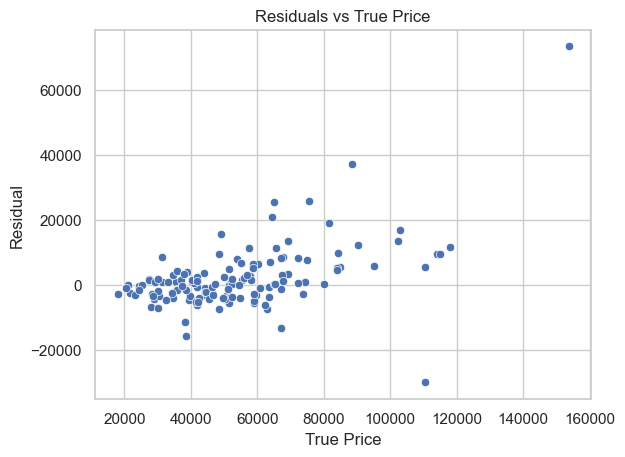

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_test_pred
sns.scatterplot(x=y_test, y=residuals)
plt.title("Residuals vs True Price")
plt.xlabel("True Price")
plt.ylabel("Residual")


In [51]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

stacked = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=100)),
        ('gb', GradientBoostingRegressor(learning_rate=0.3, n_estimators=300)),
    ],
    final_estimator=Ridge()
)
stacked.fit(X_train, y_train)


StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('gb',
                               GradientBoostingRegressor(learning_rate=0.3,
                                                         n_estimators=300))],
                  final_estimator=Ridge())

In [52]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(learning_rate=0.3, n_estimators=300, random_state=42))
]

# Define meta model (final estimator)
meta_model = Ridge(alpha=1.0)

# Create Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,  # Optional: pass original features to final estimator
    n_jobs=-1
)

# Train on training set
stacking_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = stacking_model.predict(X_val)

# Evaluate
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

# Print results
print("🧪 Stacking Model - Validation Set Evaluation:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")


🧪 Stacking Model - Validation Set Evaluation:
MAE: $4,089.92
RMSE: $5,604.73
R²: 0.9130


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Predict on the test set
y_test_pred = stacking_model.predict(X_test)

# 2. Calculate evaluation metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# 3. Display results
print("\n🧪 Stacking Model - Test Set Evaluation:")
print(f"MAE: ${mae_test:,.2f}")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"R²: {r2_test:.4f}")



🧪 Stacking Model - Test Set Evaluation:
MAE: $4,859.62
RMSE: $9,076.34
R²: 0.8389


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

rf_search = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=15, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
print("Best Parameters:", rf_search.best_params_)
print("Best Score (CV R²):", rf_search.best_score_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Library/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': None, 'max_depth': 20}
Best Score (CV R²): -9107.771441415118


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

gbr_search = RandomizedSearchCV(gbr, gbr_params, cv=5, n_iter=15, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
gbr_search.fit(X_train, y_train)

best_gbr = gbr_search.best_estimator_
print("Best Parameters:", gbr_search.best_params_)
print("Best Score (CV R²):", gbr_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.2}
Best Score (CV R²): -8233.622264893558


In [56]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

stacked_model = StackingRegressor(
    estimators=[
        ('rf', best_rf),
        ('gbr', best_gbr)
    ],
    final_estimator=Ridge(),
    passthrough=True,
    n_jobs=-1
)

stacked_model.fit(X_train, y_train)


StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=20,
                                                     max_features=None,
                                                     n_estimators=200,
                                                     random_state=42)),
                              ('gbr',
                               GradientBoostingRegressor(learning_rate=0.2,
                                                         max_depth=5,
                                                         n_estimators=300,
                                                         random_state=42))],
                  final_estimator=Ridge(), n_jobs=-1, passthrough=True)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_val_pred = stacked_model.predict(X_val)

mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")


MAE: $4,024.61
RMSE: $5,514.05
R²: 0.9158


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


y_test_pred = stacked_model.predict(X_test)

# 2. Calculate evaluation metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# 3. Display results
print("\n Stacking Model - Test Set Evaluation:")
print(f"MAE: ${mae_test:,.2f}")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"R²: {r2_test:.4f}")



 Stacking Model - Test Set Evaluation:
MAE: $4,944.55
RMSE: $9,132.72
R²: 0.8368


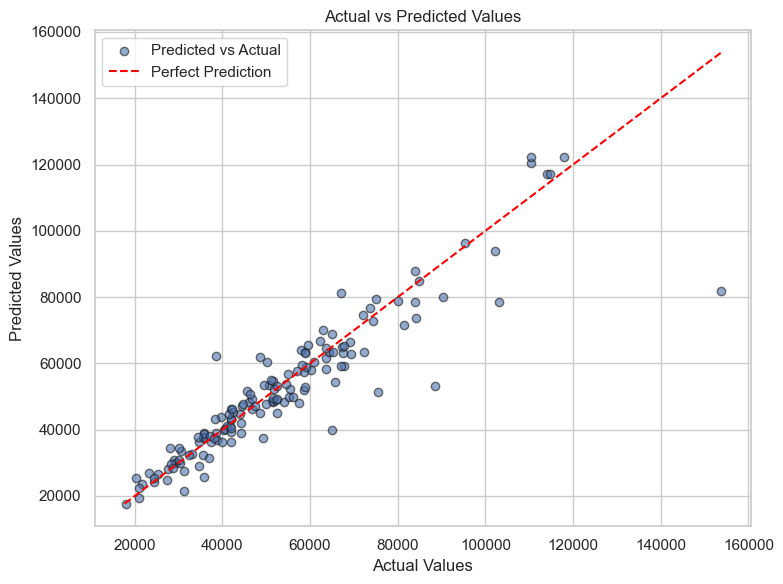

In [59]:
import matplotlib.pyplot as plt

# 1. Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k', label='Predicted vs Actual')

# 2. Plot a diagonal line (perfect prediction)
min_val = min(min(y_test), min(y_test_pred))
max_val = max(max(y_test), max(y_test_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# 3. Plot aesthetics
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: >

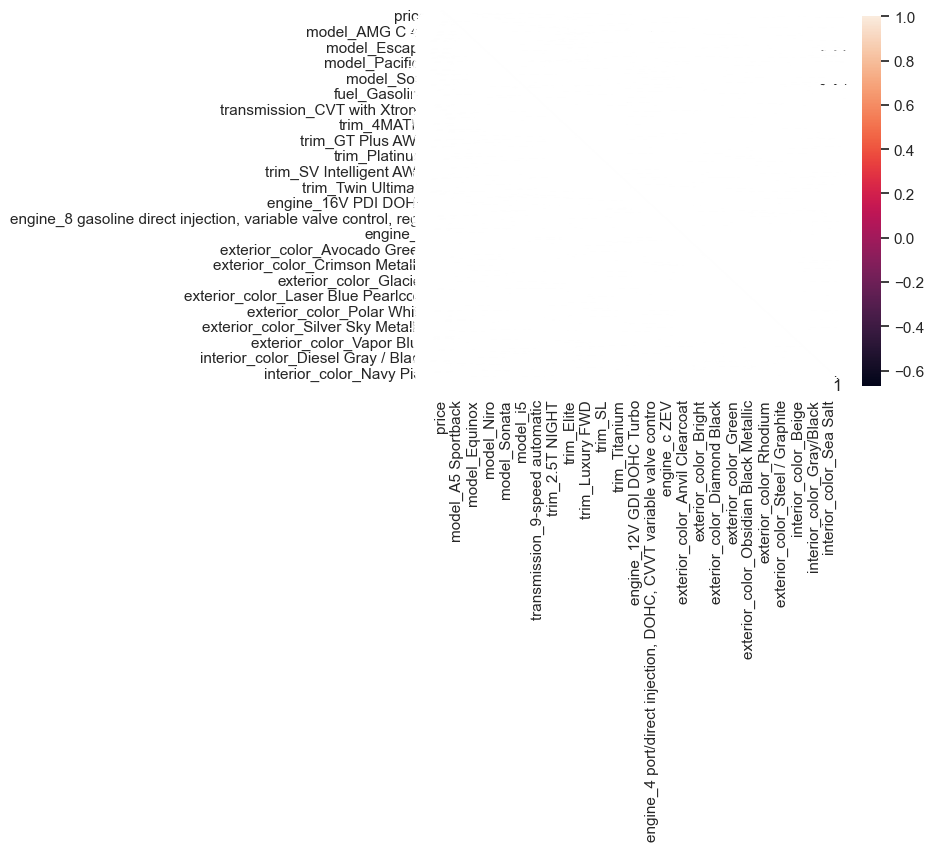

In [60]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
